In [131]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [132]:
data=pd.read_csv("/content/train.csv")

In [133]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Age

data is normally  distributed
and age column has around 20% missing values.
And age has some outliers



In [134]:
data['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Density'>

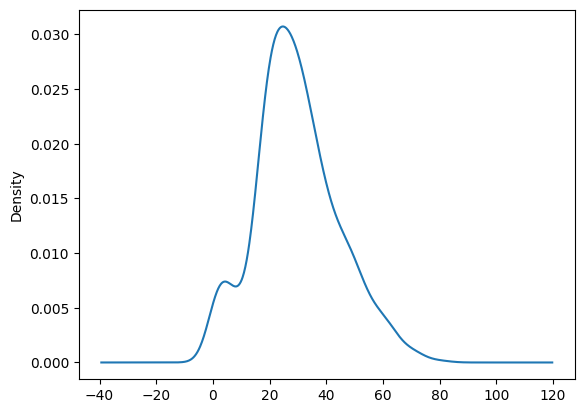

In [135]:
data['Age'].plot(kind='kde')

In [136]:
data['Age'].skew()

0.38910778230082704

<Axes: >

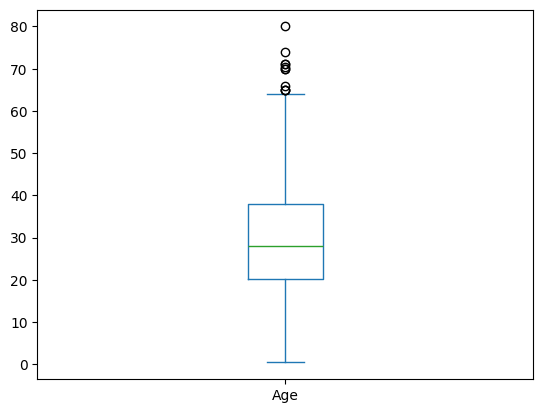

In [137]:
data['Age'].plot(kind='box')

In [138]:
missing_value_percentage=data['Age'].isnull().sum()/len(data['Age'])*100

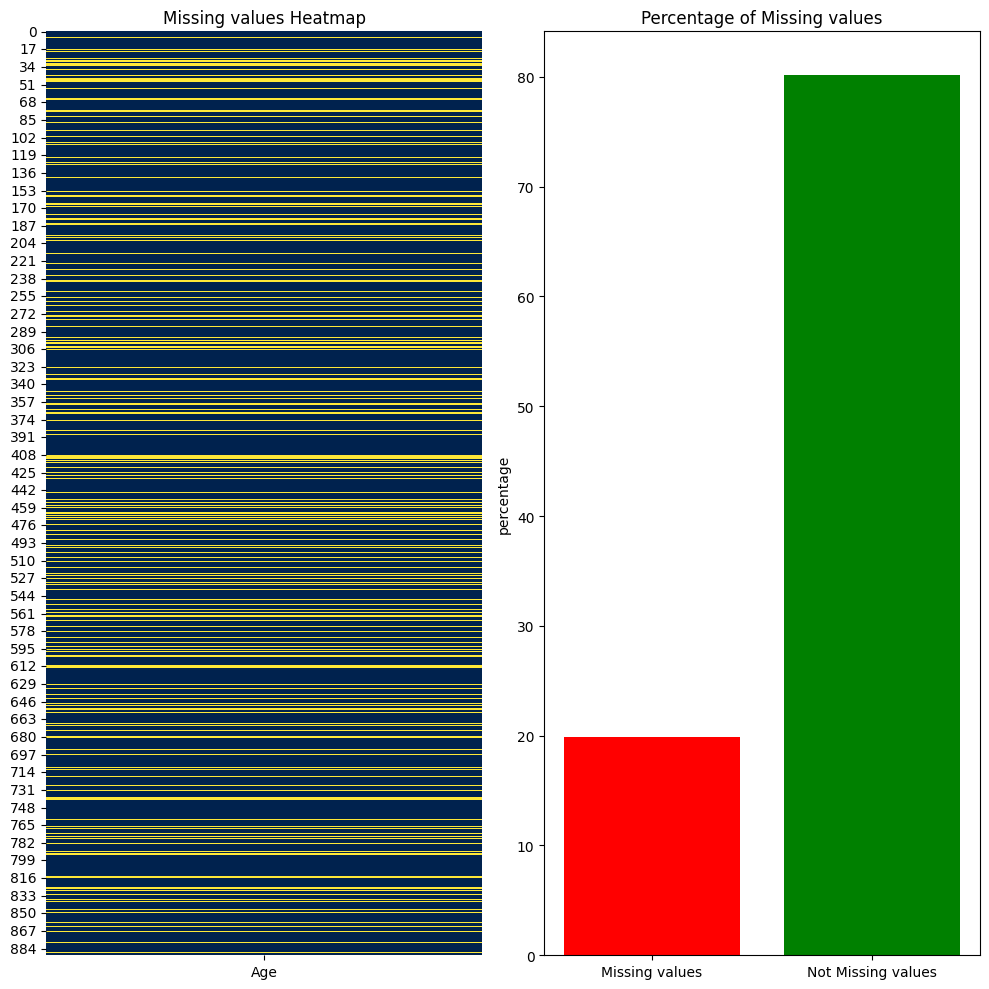

In [139]:
fig,axes=plt.subplots(1,2,figsize=(10,10))
sns.heatmap(data['Age'].isnull().to_frame(),cmap='cividis',cbar=False,ax=axes[0])
axes[0].set_title('Missing values Heatmap')


axes[1].bar(['Missing values','Not Missing values'],[missing_value_percentage,100-missing_value_percentage],color=['red','green'])
axes[1].set_title("Percentage of Missing values")
axes[1].set_ylabel("percentage")
# axes[1].set_ylim(0,100)

plt.tight_layout()
plt.show()

Fare

conclusion
The Fare column has some outliers.
The data is highly skewed(positively)
Fare column actully containing the group fare not the individual passanger fare
we need to create a new column called individual fare


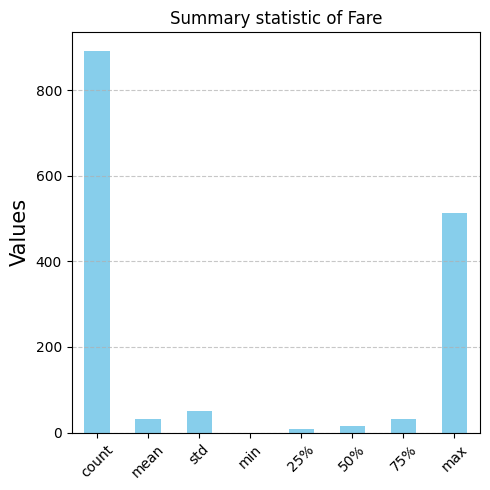

In [140]:
Fare=data['Fare']
Fare.describe().plot(kind='bar',figsize=(5,5),color='skyblue')

plt.title("Summary statistic of Fare",fontsize=12)
plt.ylabel("Values",fontsize=15)
plt.xticks(rotation=45,fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

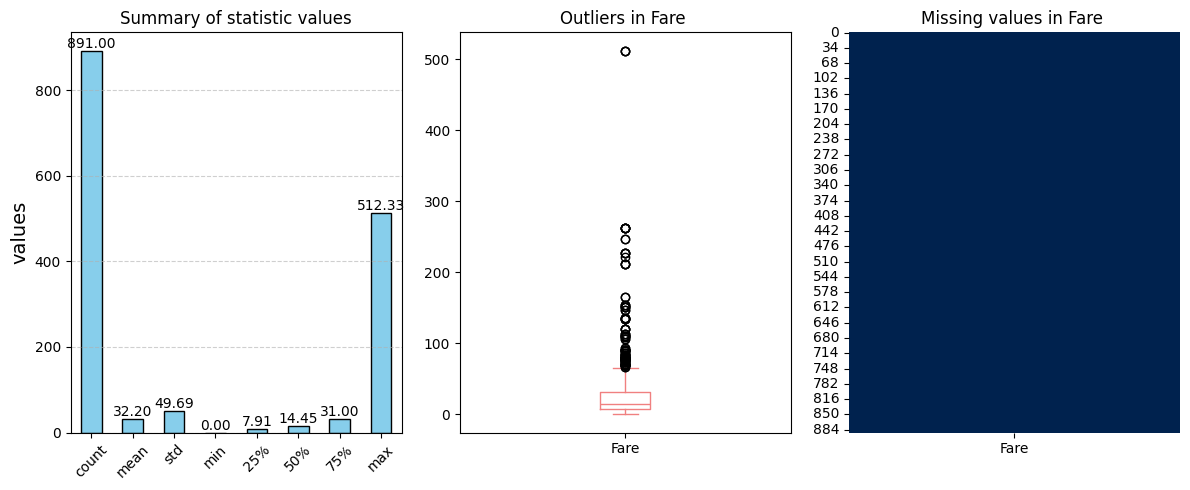

In [141]:
fig,axes=plt.subplots(1,3,figsize=(12,5))
summary.plot(kind='bar',ax=axes[0],color='skyblue',edgecolor='black')

axes[0].bar_label(axes[0].containers[0],fmt='%.2f',label_type='edge')
axes[0].set_title("Summary of statistic values")
axes[0].set_ylabel("values",fontsize=14)
axes[0].tick_params(axis='x',rotation=45)
axes[0].grid(axis='y',linestyle='--',alpha=0.6)




# sns.boxplot(x=Fare,ax=axes[1],color='lightcoral')
data['Fare'].plot(kind='box',ax=axes[1],color='lightcoral')
axes[1].set_title("Outliers in Fare ")

sns.heatmap(data['Fare'].isnull().to_frame(),ax=axes[2],cmap='cividis', cbar=False)
axes[2].set_title("Missing values in Fare ")

plt.tight_layout()


plt.show()

<Axes: ylabel='count'>

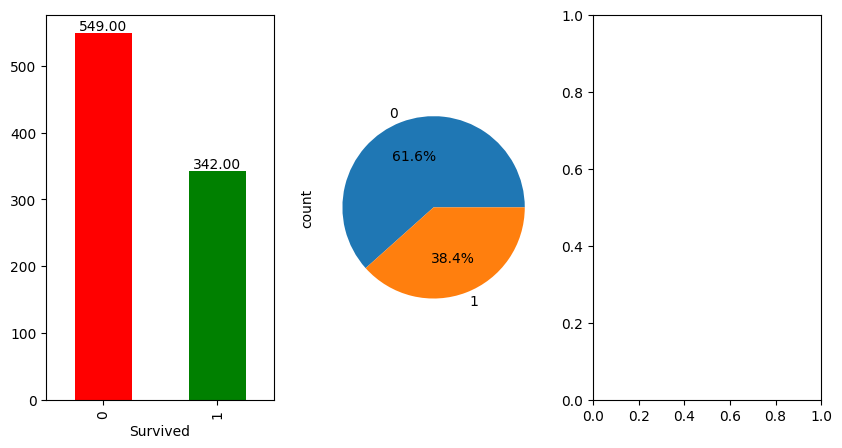

In [142]:
survive=data['Survived']
fig,axes=plt.subplots(1,3,figsize=(10,5))

survive.value_counts().plot(kind='bar',ax=axes[0],color=['red','green'])
axes[0].bar_label(axes[0].containers[0],fmt='%.2f',label_type='edge')

survive.value_counts().plot(kind='pie',autopct='%0.1f%%',ax=axes[1])



Pclass
3    491
1    216
2    184
Name: count, dtype: int64


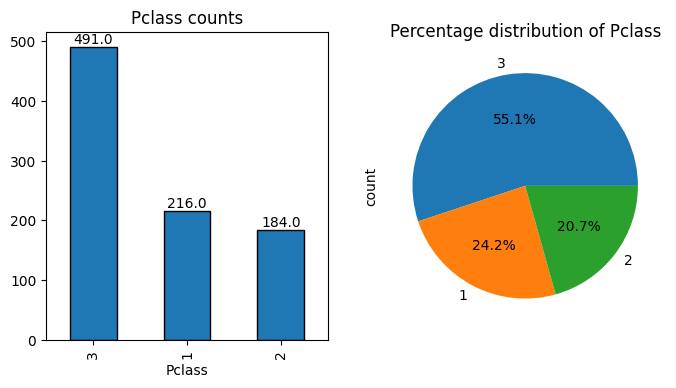

In [143]:
def show(x):
 pclass=data[x]
 count=pclass.value_counts()
 print(count)

 fig,axes=plt.subplots(1,2,figsize=(8,4))

 count.plot(kind='bar',ax=axes[0],edgecolor='black')
 axes[0].bar_label(axes[0].containers[0],fmt='%.1f',label_type='edge')
 axes[0].set_title(f"{x} counts")

 count.plot(kind='pie',autopct='%0.1f%%',ax=axes[1])
 axes[1].set_title(f"Percentage distribution of {x}")


 plt.show()

show('Pclass')

Sex
male      577
female    314
Name: count, dtype: int64


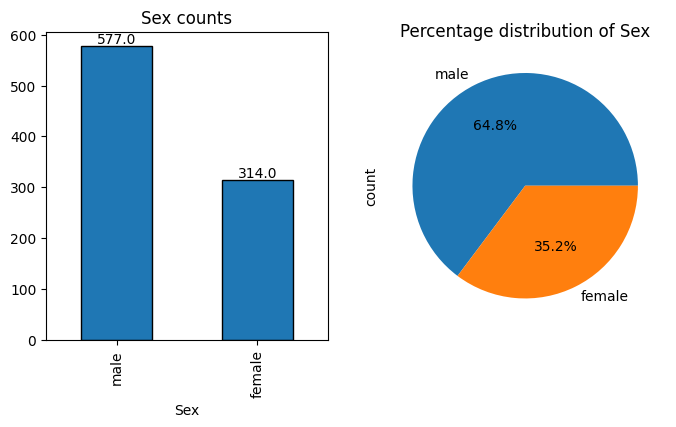

In [144]:
# sex=data['Sex']
# count=sex.value_counts()
# print(count)

# fig,axex=plt.subplots(1,2,figsize=(8,4))

# count.plot(kind='bar',ax=axex[0])
# count.plot(kind='pie',autopct='%0.1f',ax=axex[1])
show('Sex')


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


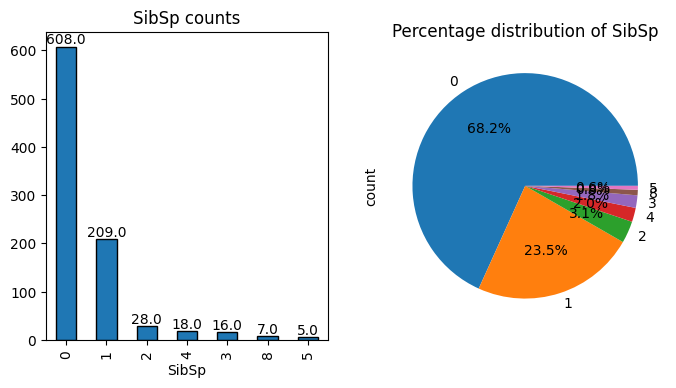

In [145]:
# sib=data['SibSp']
# count=sib.value_counts()
# print(count)
# fig,axes=plt.subplots(1,2,figsize=(8,4))

# count.plot(kind='bar',ax=axes[0])
# axes[0].bar_label(axes[0].containers[0],fmt='%0.1f',label_type='edge')
# count.plot(kind='pie',ax=axes[1])
show('SibSp')

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


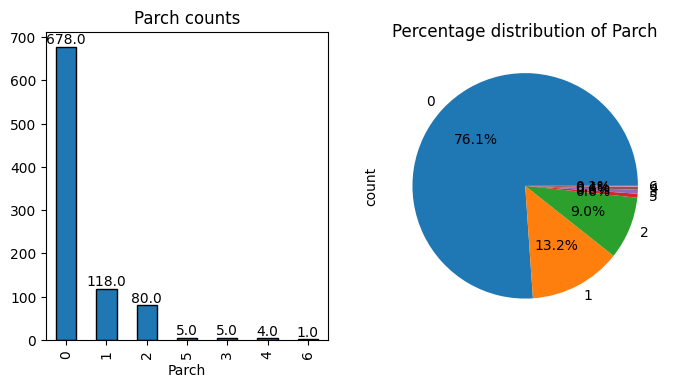

In [146]:
# sib=data['Parch']
# count=sib.value_counts()
# print(count)
# fig,axes=plt.subplots(1,2,figsize=(8,4))

# count.plot(kind='bar',ax=axes[0])
# axes[0].bar_label(axes[0].containers[0],fmt='%0.1f',label_type='edge')
# count.plot(kind='pie',ax=axes[1])

show('Parch')


Parch and SibSp column should be merge to form a new column called family_size

you can also create an another column called alone or with family

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


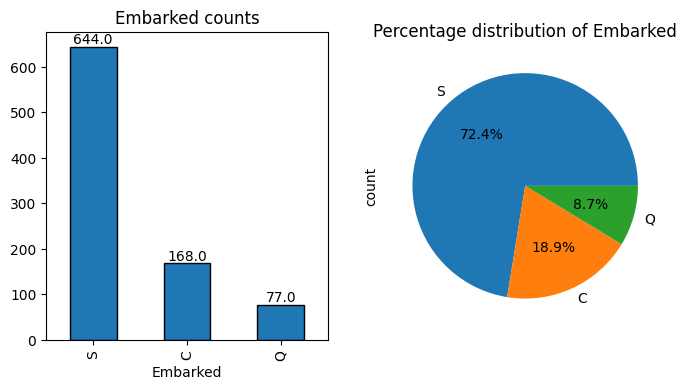

In [147]:
show('Embarked')

Taking the Survived and Pclass columns for bivariate analysis


<Axes: xlabel='Survived'>

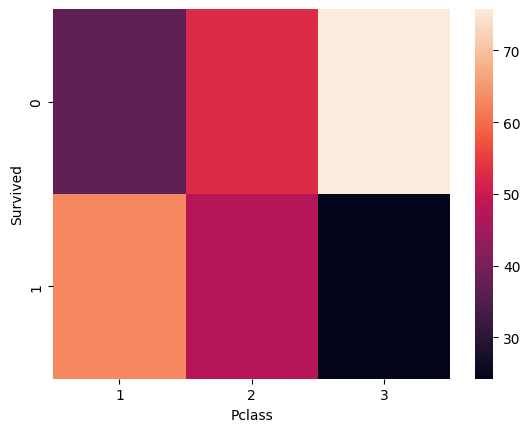

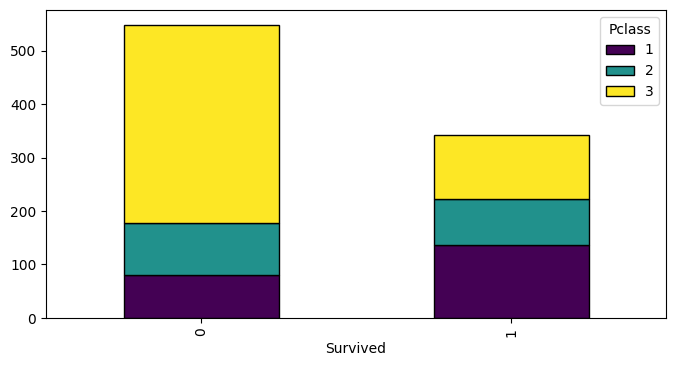

In [149]:
pd.crosstab(data['Survived'],data['Pclass'])

# you can also show in the form of percentage
pd.crosstab(data['Survived'],data['Pclass'],normalize='columns')*100

# Plotting the heat map
sns.heatmap(pd.crosstab(data['Survived'],data['Pclass'],normalize='columns')*100)

# create a cross tab graph
pd.crosstab(data['Survived'],data['Pclass']).plot(kind='bar',stacked=True,figsize=(8,4),colormap='viridis',edgecolor='black')

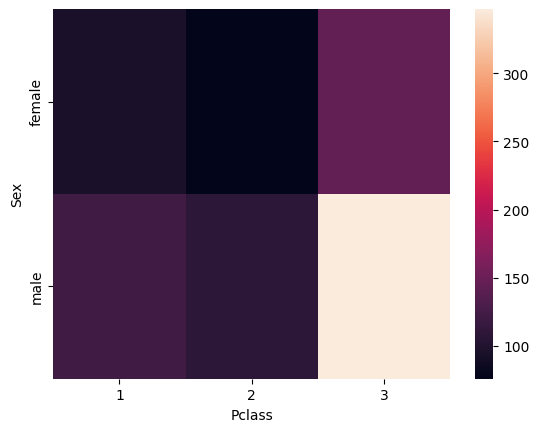

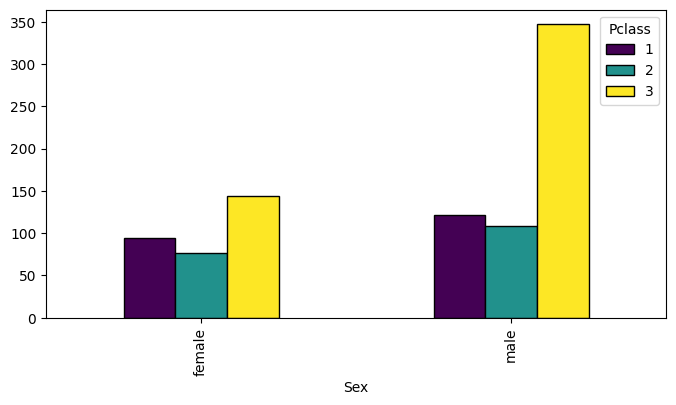

In [150]:
def show_bivariate(x,y):
  x=data[x]
  y=data[y]
  pd.crosstab(x,y,normalize='columns')*100
  sns.heatmap(pd.crosstab(x,y))
  pd.crosstab(x,y).plot(kind='bar',colormap='viridis',edgecolor='black',figsize=(8,4))

show_bivariate('Sex','Pclass')


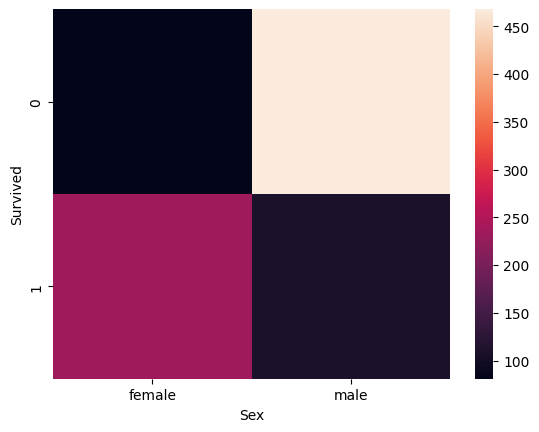

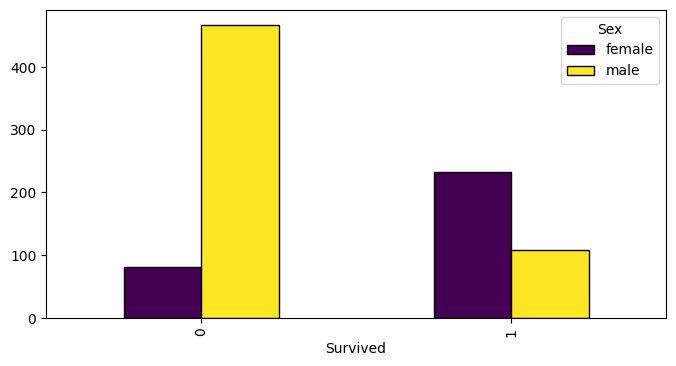

In [151]:
show_bivariate('Survived','Sex')

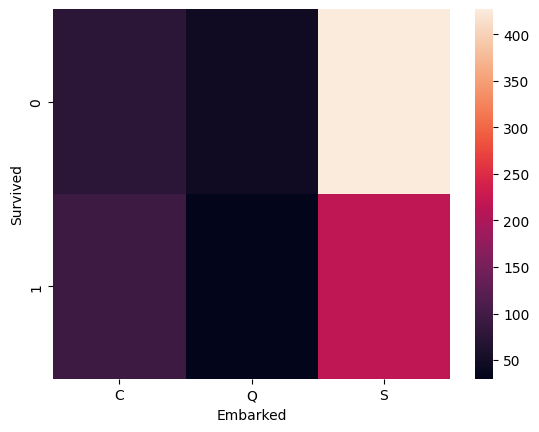

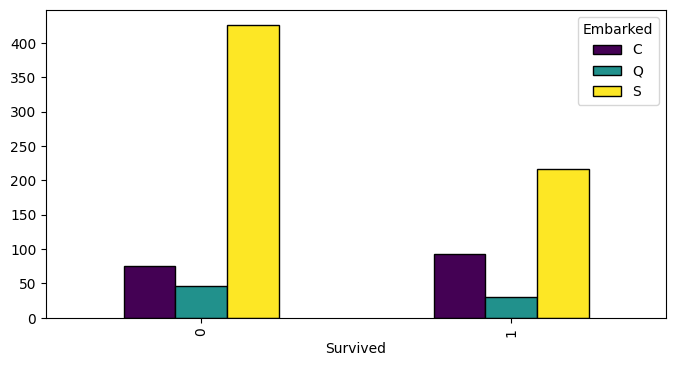

In [152]:
show_bivariate('Survived','Embarked')

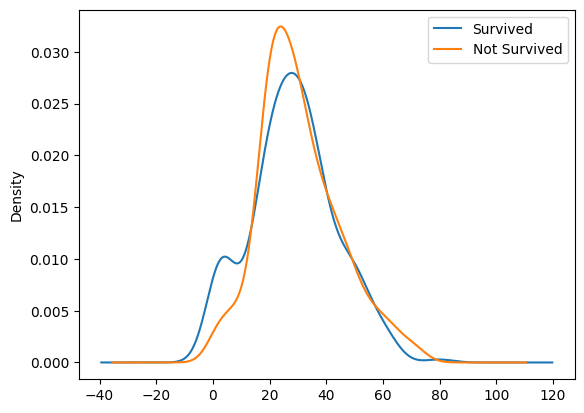

In [155]:
# plotting a kde graph btween Survived and Age

data[data['Survived']==1]['Age'].plot(kind='kde',label='Survived')
data[data['Survived']==0]['Age'].plot(kind='kde',label='Not Survived')
plt.legend()
plt.show()